In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [62]:
learning_rate = 0.001
training_epochs = 1000
display_step = 50

In [63]:
array_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
array_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n = array_X.shape[0]

In [64]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

rng = np.random

W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [65]:
pred = tf.add(tf.multiply(X, W), b)
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 2.155099630 W= 0.0561748 b= 0.0296385
Epoch: 0100 cost= 0.131830573 W= 0.322264 b= 0.0717002
Epoch: 0150 cost= 0.109155282 W= 0.34941 b= 0.0799993
Epoch: 0200 cost= 0.108489968 W= 0.351687 b= 0.0847603
Epoch: 0250 cost= 0.108101763 W= 0.351378 b= 0.0891293
Epoch: 0300 cost= 0.107724629 W= 0.350804 b= 0.093434
Epoch: 0350 cost= 0.107352518 W= 0.350205 b= 0.0977087
Epoch: 0400 cost= 0.106984906 W= 0.349607 b= 0.101957
Epoch: 0450 cost= 0.106621772 W= 0.349013 b= 0.10618
Epoch: 0500 cost= 0.106262989 W= 0.348421 b= 0.110377
Epoch: 0550 cost= 0.105908573 W= 0.347834 b= 0.114548
Epoch: 0600 cost= 0.105558410 W= 0.34725 b= 0.118695
Epoch: 0650 cost= 0.105212480 W= 0.346669 b= 0.122816
Epoch: 0700 cost= 0.104870737 W= 0.346093 b= 0.126913
Epoch: 0750 cost= 0.104533091 W= 0.345519 b= 0.130984
Epoch: 0800 cost= 0.104199566 W= 0.344949 b= 0.135031
Epoch: 0850 cost= 0.103870086 W= 0.344383 b= 0.139053
Epoch: 0900 cost= 0.103544571 W= 0.34382 b= 0.143051
Epoch: 0950 cost= 0.10322

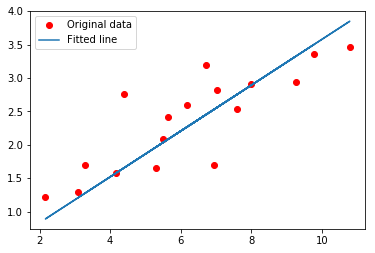

In [66]:
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(array_X,array_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: array_X, Y:array_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: array_X, Y: array_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(array_X, array_Y, 'ro', label='Original data')
    plt.plot(array_X, sess.run(W) * array_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [56]:
# Observations:
#1. learning_rate = 0.05, epoch = 100,  Training cost = 0.129638, W= 0.119819, b= 1.73431
#2. learning_rate = 0.05, epoch = 500,  Training cost = 0.0782165 W= 0.240263 b= 0.826433
#3. learning_rate = 0.005, epoch = 100,  Training cost = 0.0803354 W= 0.283529 b= 0.564963 
#4. learning_rate = 0.001, epoch = 1000,  Training cost = 0.102905 W= 0.342704 b= 0.150974

#The most optimum values for W and b for training cost to remain low is W= 0.240263 b= 0.826433